In [327]:
import sys
import os
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
import numpy as np
import random

from bs4 import BeautifulSoup
import pandas as pd
import requests

from time import sleep

In [7]:
path = "data/raw/"
essay_file = path+ "asap-aes/train.tsv"

i=0

essayList = []
with open(essay_file) as f:
    for line in f:
        if line.startswith("Id"):
            continue
        splitLine = line.strip().split("\t")
        scores = map(int, splitLine[2:4])
        avgscore = sum(scores)/2
        essay = sent_tokenize(splitLine[4])
        for sent in essay:
            essayList.append([sent, avgscore])
    

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/asap-aes/train.tsv'

In [10]:
path = "data/raw/"
short_answer_file = path+ "asap-sas/train.tsv"

i=0

dataList = []
with open(short_answer_file) as f:
    for line in f:
        if line.startswith("Id"):
            continue
        splitLine = line.strip().split("\t")
        scores = map(int, splitLine[2:4])
        avgscore = sum(scores)/2
        essay = sent_tokenize(splitLine[4])
        for sent in essay:
            dataList.append([sent, avgscore])
    

In [11]:
highScores = []
lowScores = []
for data in dataList:
    if len(word_tokenize(data[0])) > 20:
        continue
    if data[1] >= 2:
        highScores.append(data[0])
    if data[1] ==0:
        lowScores.append(data[0])
    

In [40]:
import csv

with open('sas_high.csv', 'w', newline='\n') as f:
    writer = csv.writer(f)
    writer.writerows(highScores)
    

with open('sas_low.csv', 'w', newline='\n') as f:
    writer = csv.writer(f)
    writer.writerows(lowScores)

In [42]:
Counter([x[1] for x in dataList])

Counter({1.0: 11279,
         0.0: 11879,
         2.0: 11669,
         0.5: 2255,
         3.0: 2247,
         2.5: 510,
         1.5: 3216})

In [131]:

random.shuffle(cleanLow)
train_low = cleanLow[:5000]
test_low = cleanLow[5500:]
dev_low = cleanLow[5000:5500]

random.shuffle(cleanHigh)
train_high = cleanHigh[:5000]
test_high = cleanHigh[5500:]
dev_high = cleanHigh[5000:5500]

In [23]:
import string

def clean(data_list):
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    newList = []
    for sent in data_list:
        if len(sent) < 40:
            continue
        if '^' in sent:
            continue
        #sent = re.sub(r'\d+', '', sent)
        

        #sent = re.sub('['+string.punctuation+']', '', sent)
        sent = sent.lower()
        
        newList.append(sent + '\n')
    
    return newList
        

In [24]:
cleanLow = clean(lowScores)

In [25]:
cleanHigh = clean(highScores)

In [26]:
len(cleanLow)

6057

In [27]:
len(cleanHigh)

7221

In [28]:
with open('sas_data.1', 'w') as f:
    f.writelines(cleanHigh)

In [29]:
with open('sas_data.0', 'w') as f:
    f.writelines(cleanLow)

In [106]:
high_label = [1 for x in cleanHigh]
low_label = [0 for x in cleanLow]

In [111]:
labels = high_label + low_label

In [113]:
all_data = cleanHigh + cleanLow

In [114]:
import random

c = list(zip(all_data, labels))

random.shuffle(c)

shuff_data, shuff_labels = zip(*c)


In [119]:
with open('../text_style_transfer/model/data/sas_data', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', shuff_data)
    f.writelines(retokenized)
    
# with open('../text_style_transfer/model/data/sas.test.1', 'w') as f:
#     retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', test_high)
#     f.writelines(retokenized)
    
# with open('../text_style_transfer/model/data/sas.dev.1', 'w') as f:
#     retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', dev_high)
#     f.writelines(retokenized)

with open('../text_style_transfer/model/data/sas_labels', 'w') as f:
    f.writelines(map(lambda x: str(x) + '\n', shuff_labels))

In [132]:


with open('../language-style-transfer/data/sas.train.1', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', train_high)
    f.writelines(retokenized)
    
with open('../language-style-transfer/data/sas.test.1', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', test_high)
    f.writelines(retokenized)
    
with open('../language-style-transfer/data/sas.dev.1', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', dev_high)
    f.writelines(retokenized)

with open('../language-style-transfer/data/sas.train.0', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', train_low)
    f.writelines(retokenized)
    
with open('../language-style-transfer/data/sas.test.0', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', test_low)
    f.writelines(retokenized)
    
with open('../language-style-transfer/data/sas.dev.0', 'w') as f:
    retokenized = map(lambda x: ' '.join(word_tokenize(x)) + '\n', dev_low)
    f.writelines(retokenized)
    

In [53]:
' '.join(word_tokenize(highScores[0][0])) 

'You would need many more pieces of information to replicate the experiment .'

In [ ]:
def sentence_to_wordlist(raw_sentence):
    
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", raw_sentence)
    tokens = nltk.word_tokenize(clean_sentence)
    
    return tokens

In [ ]:

def tokenize(essay):
    stripped_essay = essay.strip()
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_essay)
    
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
    return tokenized_sentences

In [47]:
clean_text(dataList[0][0])

'some additional information that we would need to replicate the experiment is how much vinegar should be placed in each identical container how or what tool to use to measure the mass of the four different samples and how much distilled water to use to rinse the four samples after taking them out of the vinegar'

In [ ]:
class Vocabulary(object):
    def __init__(self, vocab_file, emb_file='', dim_emb=0):
        with open(vocab_file, 'rb') as f:
            self.size, self.word2id, self.id2word = pickle.load(f)
        self.dim_emb = dim_emb
        self.embedding = np.random.random_sample(
            (self.size, self.dim_emb)) - 0.5

        if emb_file:
            print( 'Loading word vectors from', emb_file)
            with open(emb_file) as f:
                for line in f:
                    parts = line.split()
                    word = parts[0]
                    vec = np.array([float(x) for x in parts[1:]])
                    if word in self.word2id:
                        self.embedding[self.word2id[word]] = vec

        for i in range(self.size):
            self.embedding[i] /= LA.norm(self.embedding[i])

def build_vocab(data, path, min_occur=5):
    word2id = {'<pad>':0, '<go>':1, '<eos>':2, '<unk>':3}
    id2word = ['<pad>', '<go>', '<eos>', '<unk>']

    words = [word for sent in data for word in sent]
    cnt = Counter(words)
    for word in cnt:
        if cnt[word] >= min_occur:
            word2id[word] = len(word2id)
            id2word.append(word)
    vocab_size = len(word2id)
    with open(path, 'wb') as f:
        pickle.dump((vocab_size, word2id, id2word), f, pickle.HIGHEST_PROTOCOL)


In [152]:
with open('../language-style-transfer/data/sas.test.0') as f:
    data_0 = f.readlines()

In [151]:
with open('../language-style-transfer/data/sas.test.1') as f:
    data_1 = f.readlines()

In [133]:
with open('../language-style-transfer/tmp/sas.test.0.tsf') as f:
    test_0 = f.readlines()

In [134]:
with open('../language-style-transfer/tmp/sas.test.1.tsf') as f:
    test_1 = f.readlines()

In [145]:
def strip_unk(sent):
    sent = re.sub(r'<unk>', '', sent)
    
    return word_tokenize(sent)

In [155]:
test_1_strip = list(map(strip_unk, test_1))
test_0_strip = list(map(strip_unk, test_0))
data_1_strip = list(map(strip_unk, data_1))
data_0_strip = list(map(strip_unk, data_0))

In [157]:
def bleu(sent1, sent2):
    
    score = nltk.translate.bleu_score.sentence_bleu([sent1], sent2)
    return score

In [158]:

bleus_1 = []
for i in range(len(test_1_strip)):
    bleus_1.append(bleu(data_1_strip[i],test_1_strip[i]))

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
The

In [160]:
data_1_strip[0],test_1_strip[0]

(['the',
  'author',
  'first',
  'starts',
  'out',
  'with',
  'the',
  'introduction',
  'which',
  'explains',
  'what',
  'it',
  'is',
  'about'],
 ['the',
  'author',
  'organizes',
  'the',
  'article',
  'in',
  'what',
  'it',
  'is',
  'going',
  'about',
  'space',
  'junk'])

In [162]:
data_1_strip[1],test_1_strip[1]

(['as',
  'the',
  'article',
  'states',
  'in',
  'paragraph',
  'the',
  'snakes',
  'have',
  'imperiled',
  'endangered',
  'species',
  'in',
  'the',
  'florida',
  'keys'],
 ['in', 'the', 'and', 'the', 'koala', 'are', 'different', 'of', 'the'])

### My Kids Way Essays

In [18]:
req = requests.get("https://www.mykidsway.com/essays/a-house-on-fire-2/")
soup = BeautifulSoup(req.content, 'html.parser')
text = soup.find_all("span", itemprop="description")

AttributeError: ResultSet object has no attribute 'get'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [24]:
data = []
for item in text:
    data.append(item.get_text().split('\n'))

In [99]:
paginated_links = "https://www.mykidsway.com/essays/page/{}/"

all_essays = req = requests.get("https://www.mykidsway.com/essays/")
essay_html = BeautifulSoup(all_essays.content, 'html.parser')
divs = essay_html.find_all("div", class_="hovereffect")


In [106]:
all_links = []
for content in divs:
    all_links.append(content.find("a").get("href"))

In [108]:
for i in range(1,20):
    new_page = paginated_links.format(str(i))
    
    all_essays = req = requests.get(new_page)
    essay_html = BeautifulSoup(all_essays.content, 'html.parser')
    divs = essay_html.find_all("div", class_="hovereffect")
    

    for content in divs:
        all_links.append(content.find("a").get("href"))
    sleep(1)

In [111]:
def getText(link):
    
    req = requests.get(link)
    soup = BeautifulSoup(req.content, 'html.parser')
    text = soup.find_all("span", itemprop="description")
    
    data = []
    for item in text:
        split_text = item.get_text().split('\n')
        total_len = sum([len(x) for x in split_text])
        if total_len > 2000:
            print("skipping ", link)
            continue
            
        for sentence in split_text:
            data.append(sentence)
    
    return data


In [120]:

# all_sentences = []
# for link in set(all_links):
#     print(link)
#     data_list = getText(link)
#     for sentence in data_list:
#         all_sentences.append(sentence)
        
#     sleep(1)

In [136]:

def clean(data_list):
#     regex = re.compile('[%s]' % re.escape(string.punctuation))
    newList = []
    for sent in data_list:
        if len(sent) < 40:
            continue
        if '^' in sent:
            continue
        if bool(re.search(r'\d', sent)):
            continue
            
        sent = sent.lower()
        newList.append(sent + '\n')
    
    return newList
        

In [137]:
cleanedEssays = clean(all_sentences)

In [138]:
reordered = []
for sent in cleanedEssays:
    split_sent = sent_tokenize(sent.strip())
    for sentence in split_sent:
        if (len(word_tokenize(sentence)) > 20) or (len(word_tokenize(sentence)) < 4):
            continue
        reordered.append(sentence + '\n')

In [140]:
with open("/Users/spencerbraun/Documents/Stanford/CS 230 - Deep Learning/Project/CS_230_Project/data/processed/KMW_essays.txt", 'w') as f:
    f.writelines(reordered)

### Hewlett AES processing

In [147]:

aes_file = "/Users/spencerbraun/Documents/Stanford/CS 230 - Deep Learning/Project/CS_230_Project/data/raw/asap-aes/training_set_rel3.tsv"
aes_list = [] 
with open(aes_file, encoding='utf-8', errors='ignore') as f:
    for line in f:
        aes_list.append(line.strip().split('\t'))


In [177]:
aes_df = pd.DataFrame(aes_list[1:], columns=aes_list[0])

In [166]:
aes_df[["rater1_domain1"]] = aes_df["rater1_domain1"].applymap(int)


AttributeError: 'Series' object has no attribute 'applymap'

In [182]:
import numpy as np

In [185]:
num_cols = ['rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score']

aes_df[num_cols] = aes_df[num_cols].applymap(lambda x: np.nan if (x == "") or (x is None) else int(x))


In [205]:
aes_df["domain2_score"].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12973    0.0
12974    0.0
12975    0.0
12976    0.0
12977    0.0
Name: domain2_score, Length: 12978, dtype: float64

In [208]:
aes_df["total_score"] = (aes_df["domain1_score"] + aes_df["domain2_score"].fillna(aes_df["domain1_score"]))/2

In [214]:
cols = ['essay_id', 'essay_set', 'essay', 'domain1_score', 'domain2_score', 'total_score']
aes_df[cols]

,essay_id,essay_set,essay,domain1_score,domain2_score,total_score
0,1,1,"""Dear local newspaper, I think effects compute...",8,NaN,8.0
1,2,1,"""Dear @CAPS1 @CAPS2, I believe that using comp...",9,NaN,9.0
2,3,1,"""Dear, @CAPS1 @CAPS2 @CAPS3 More and more peop...",7,NaN,7.0
3,4,1,"""Dear Local Newspaper, @CAPS1 I have found tha...",10,NaN,10.0
4,5,1,"""Dear @LOCATION1, I know having computers has ...",8,NaN,8.0
...,...,...,...,...,...,...
12973,21626,8,""" In most stories mothers and daughters are ei...",35,NaN,35.0
12974,21628,8,""" I never understood the meaning laughter is t...",32,NaN,32.0
12975,21629,8,"""When you laugh, is @CAPS5 out of habit, or is...",40,NaN,40.0
12976,21630,8,""" Trippin' on fe...",40,NaN,40.0


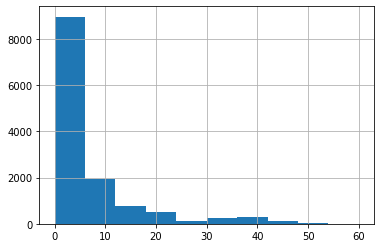

In [218]:
aes_df.total_score.hist()

In [269]:
aes_essays = aes_df.query("total_score > 1")["essay"].values.tolist()

In [277]:
def cleanAES(dataList):
    newList = []
    for sent in dataList:
        sent = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)', '', sent)
        sent = sent.replace("\\","")
        sent = sent.replace("\\'","")
        sent = sent.strip().strip("'").strip('"')

        if len(sent) < 40:
            continue
        if '^' in sent:
            continue
        

        sent = sent.lower()#.decode('utf8', 'ignore')
        newList.append(sent + '\n')
    
    return newList

In [278]:
clean_aes = cleanAES(aes_essays)

In [300]:
# from spellchecker import SpellChecker

# spell = SpellChecker()

split_aes = []
for essay in clean_aes:
    split_up = sent_tokenize(essay)
    for sent in split_up:
        words = word_tokenize(sent)
#         misspelled = spell.unknown(words)
#         new_items = [spell.correction(x) if x in misspelled else x for x in words]
        if len(words) > 30:
            continue
        if len(words) < 4:
            continue
        split_aes.append(sent+'\n')

In [301]:
with open("/Users/spencerbraun/Documents/Stanford/CS 230 - Deep Learning/Project/CS_230_Project/data/processed/aes.txt", 'w') as f:
    f.writelines(split_aes)

### Sophisticated Writing - Project Gutenberg

In [366]:
gutenLinks = [
    "http://www.gutenberg.org/cache/epub/5827/pg5827.txt", #Russell, The Problems of Philosophy
    "http://www.gutenberg.org/cache/epub/15718/pg15718.txt", #Bleyer, How To Write Special Feature Articles
    "https://www.gutenberg.org/files/492/492-0.txt", #Essays in the Art of Writing, by Robert Louis
    "https://www.gutenberg.org/files/37090/37090-0.txt", #Our Knowledge of the External World as a Field for Scientific Method in Philosoph, by Bertrand Russell
    "https://www.gutenberg.org/files/42580/42580-8.txt", #Expository Writing, by Mervin James Curl
    "http://www.gutenberg.org/cache/epub/2529/pg2529.txt", #The Analysis of Mind, by Bertrand Russell
    "https://www.gutenberg.org/files/38280/38280-0.txt", #Modern Essays, by Various
    "https://www.gutenberg.org/files/205/205-0.txt" #Walden, and On The Duty Of Civil Disobedience, by Henry David Thoreau
    "https://www.gutenberg.org/files/1022/1022-0.txt" #Walking, by Henry David Thoreau
]


In [367]:
def filterSentences(sentList):
    filteredList = []
    for sent in sentList:
        sent = sent.replace("\\","")
        sent = sent.replace("\\'","")


        if len(sent) < 40:
            continue
        if '^' in sent:
            continue
        if bool(re.search(r'\d', sent)):
            continue
        if bool(re.search(r"\b[A-Z][A-Z]+\b", sent)):
            continue
        if bool(re.search(r'\"', sent)):
            continue
        if bool(re.search(r'_', sent)):
            continue

        sent = sent.strip()
        sent = sent.lower()
        sent = ' '.join(sent.split())
        filteredList.append(sent + '\n')

    return filteredList

In [368]:
def readGutenberg(url):
    content = requests.get(url).content.decode('ascii', 'ignore')
    content_list = sent_tokenize(content.replace('\r\n', ' '))
    
    filtered_list = filterSentences(content_list)
    
    return filtered_list[100:]

In [369]:
allGuten = []
for url in gutenLinks:
    allGuten.append(readGutenberg(url))

In [370]:
len(allGuten)

8

In [371]:
sum([len(x) for x in allGuten])

15693

In [372]:
allSophs = [y for x in allGuten for y in x]

In [375]:
with open("/Users/spencerbraun/Documents/Stanford/CS 230 - Deep Learning/Project/CS_230_Project/data/processed/allsophs.txt", 'w') as f:
    f.writelines(allSophs)